# ***0. Import Library***

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import sklearn
import missingno as msno

import sklearn as sk
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

plt.style.use('seaborn')
sns.set(font_scale=2.5)

# Used to Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

# ***1. Import Data***

In [2]:
titanic_data = pd.read_csv('/kaggle/input/titanic/train.csv')
titanic_test_data = pd.read_csv('/kaggle/input/titanic/test.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# ***2. Analysis***

In [3]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## ***Data Charts***

#### ***1. Missing Data Check***

<Axes: >

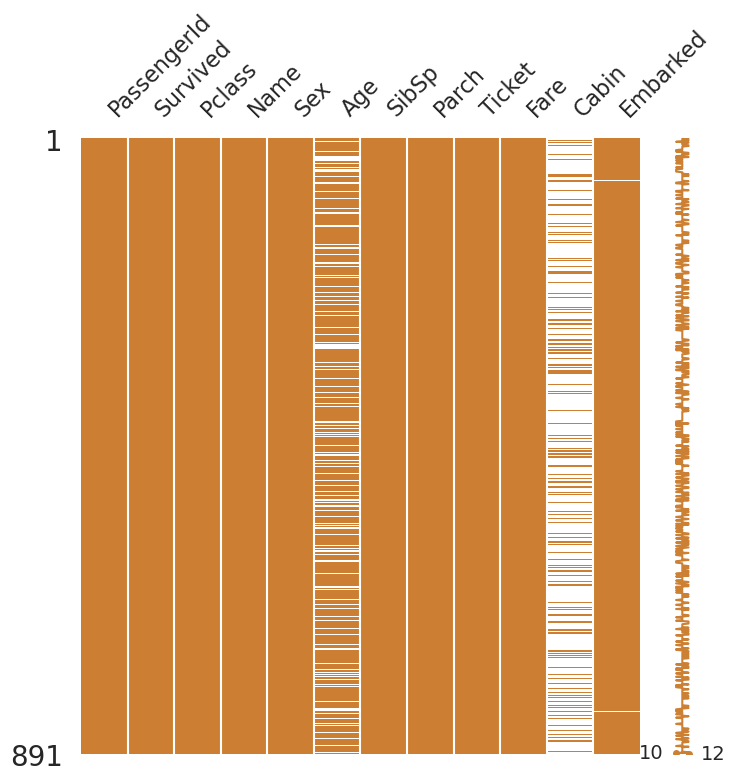

In [4]:
msno.matrix(df=titanic_data.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

#### ***2. Training Data Label Distribution***

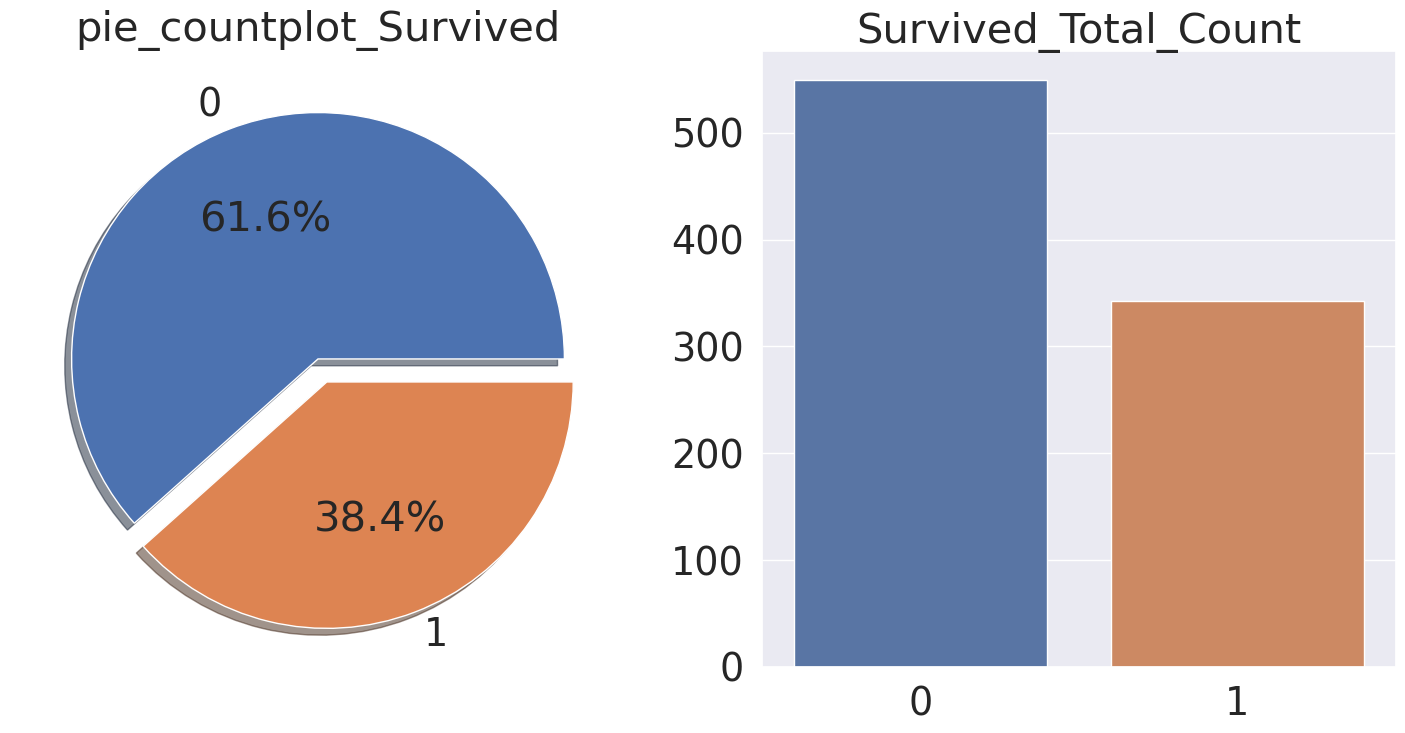

In [5]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

titanic_data['Survived'].value_counts().plot.pie(explode=[0, 0.1], ax=ax[0], autopct='%1.1f%%', shadow=True)
ax[0].set_ylabel('')
ax[0].set_title('pie_countplot_Survived')

sns.countplot(x='Survived', data=titanic_data, ax=ax[1])
ax[1].set_title('Survived_Total_Count')
ax[1].set_xlabel('')
ax[1].set_ylabel('')

plt.show()

#### ***3. Data Visualization***

##### ***1. Pclass***

In [6]:
titanic_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [7]:
pd.crosstab(titanic_data['Pclass'], titanic_data['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<Axes: xlabel='Pclass'>

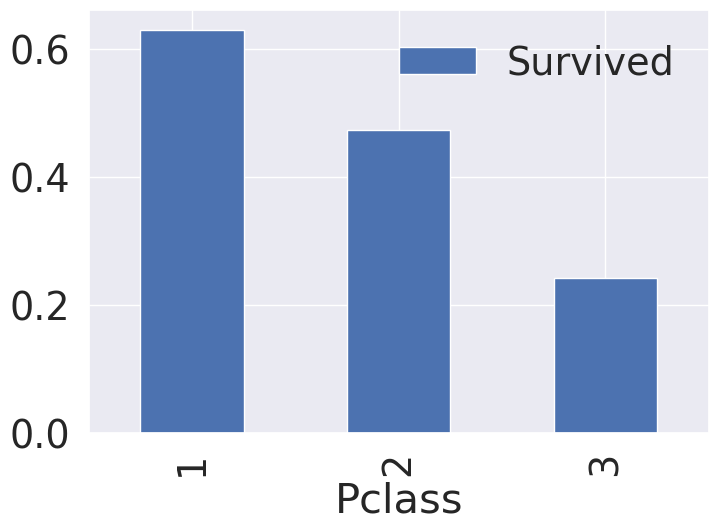

In [8]:
titanic_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

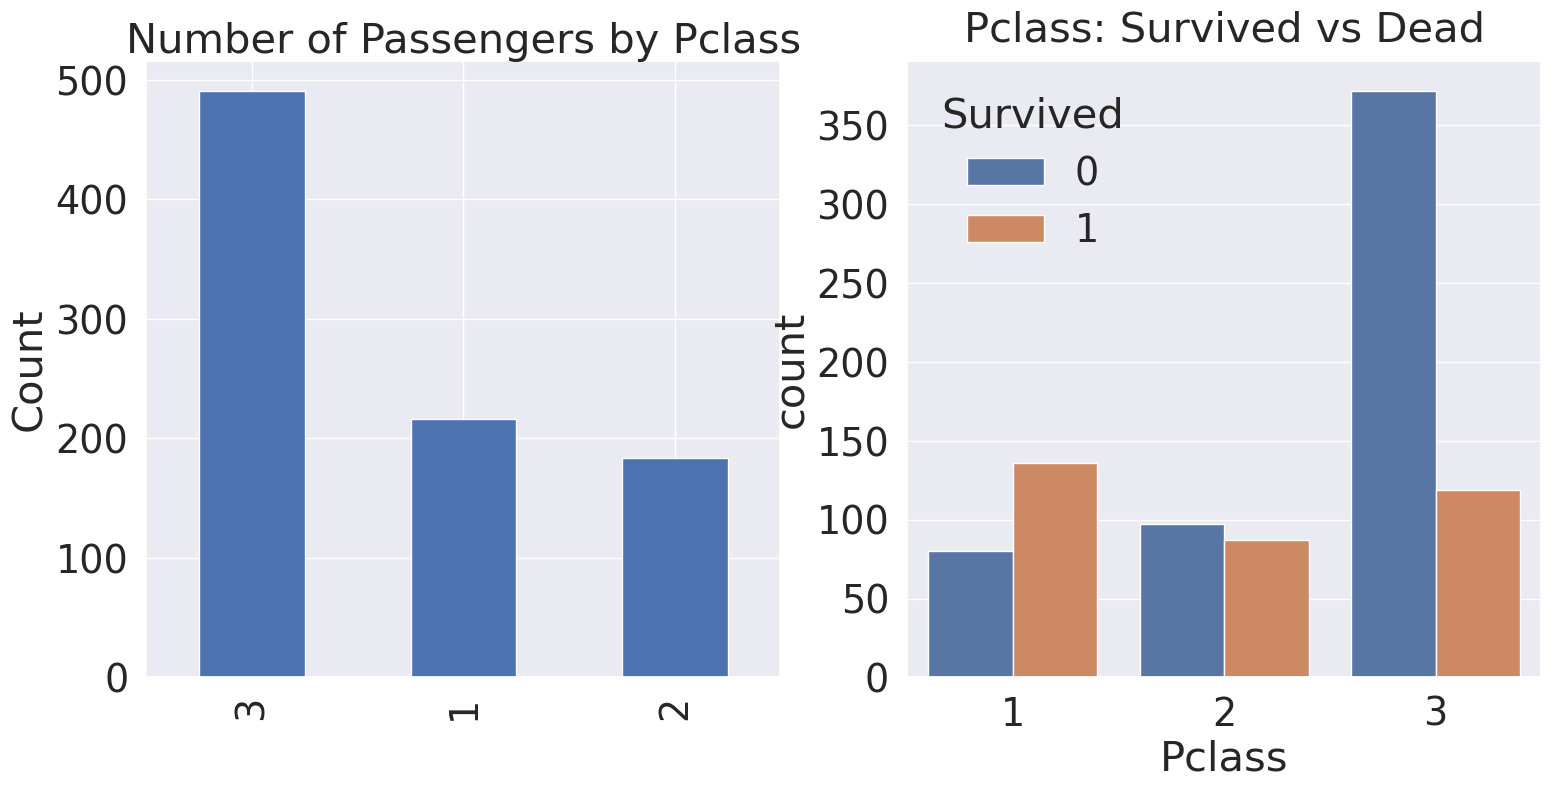

In [9]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18, 8))

titanic_data['Pclass'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Number of Passengers by Pclass')
ax[0].set_ylabel('Count')

sns.countplot(x='Pclass', data=titanic_data, hue='Survived', ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)

plt.show()

=> **Conclusion**: The lower Pclass Number, the higher Survived Rate.

##### ***2. Sex***

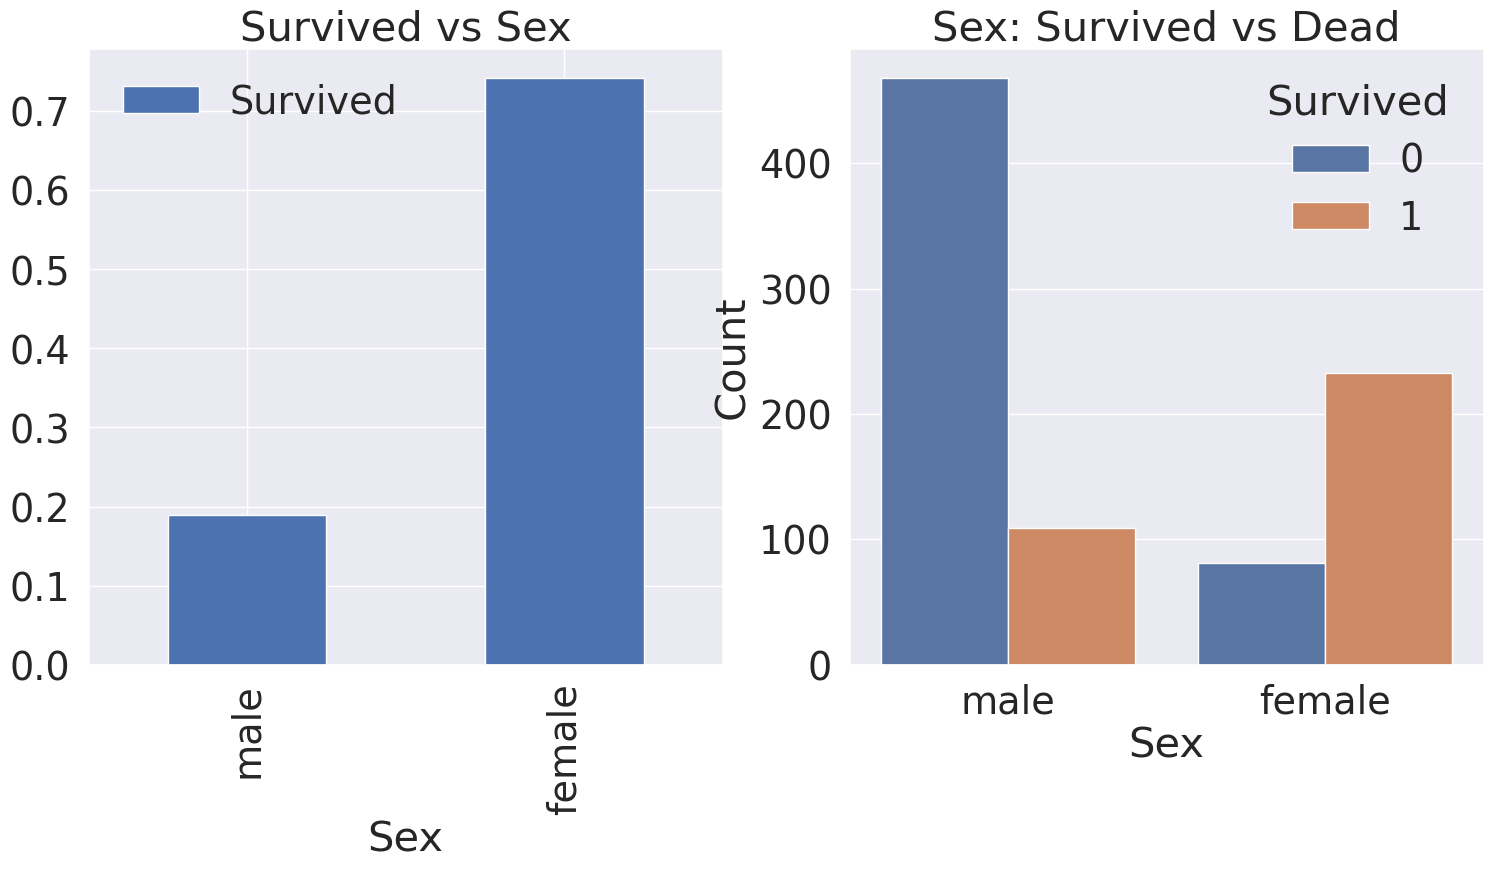

In [10]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

titanic_data[['Sex', 'Survived']].groupby('Sex', as_index=True).mean().sort_values(by='Survived').plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot(x='Sex', hue='Survived', data=titanic_data, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
ax[1].set_ylabel('Count')

plt.show()

In [11]:
titanic_data[['Sex', 'Survived']].groupby('Sex', as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [12]:
pd.crosstab(titanic_data['Sex'], titanic_data['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


=> **Conclusion**: Females were more likely to survive.

***※ Pclass & Sex Combination***

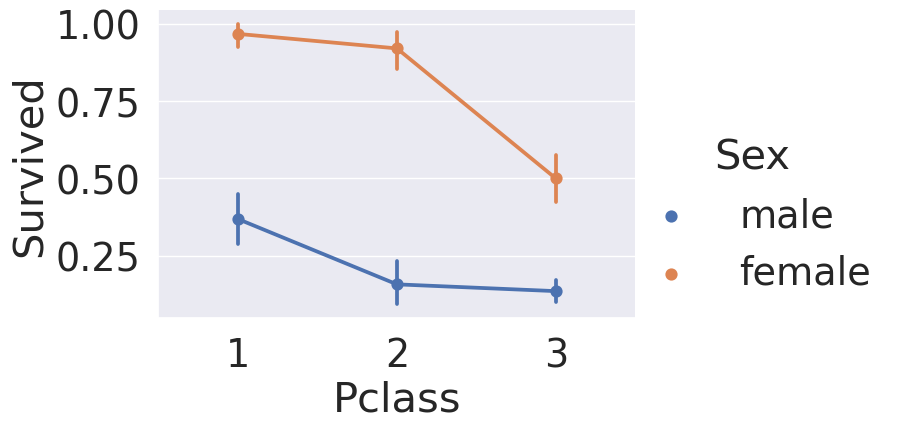

In [13]:
# sns.factorplot() were deprecated recently - used sns.catplot() instead.
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=titanic_data, aspect=1.5, kind='point')

##### ***3. Age***

In [14]:
titanic_data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

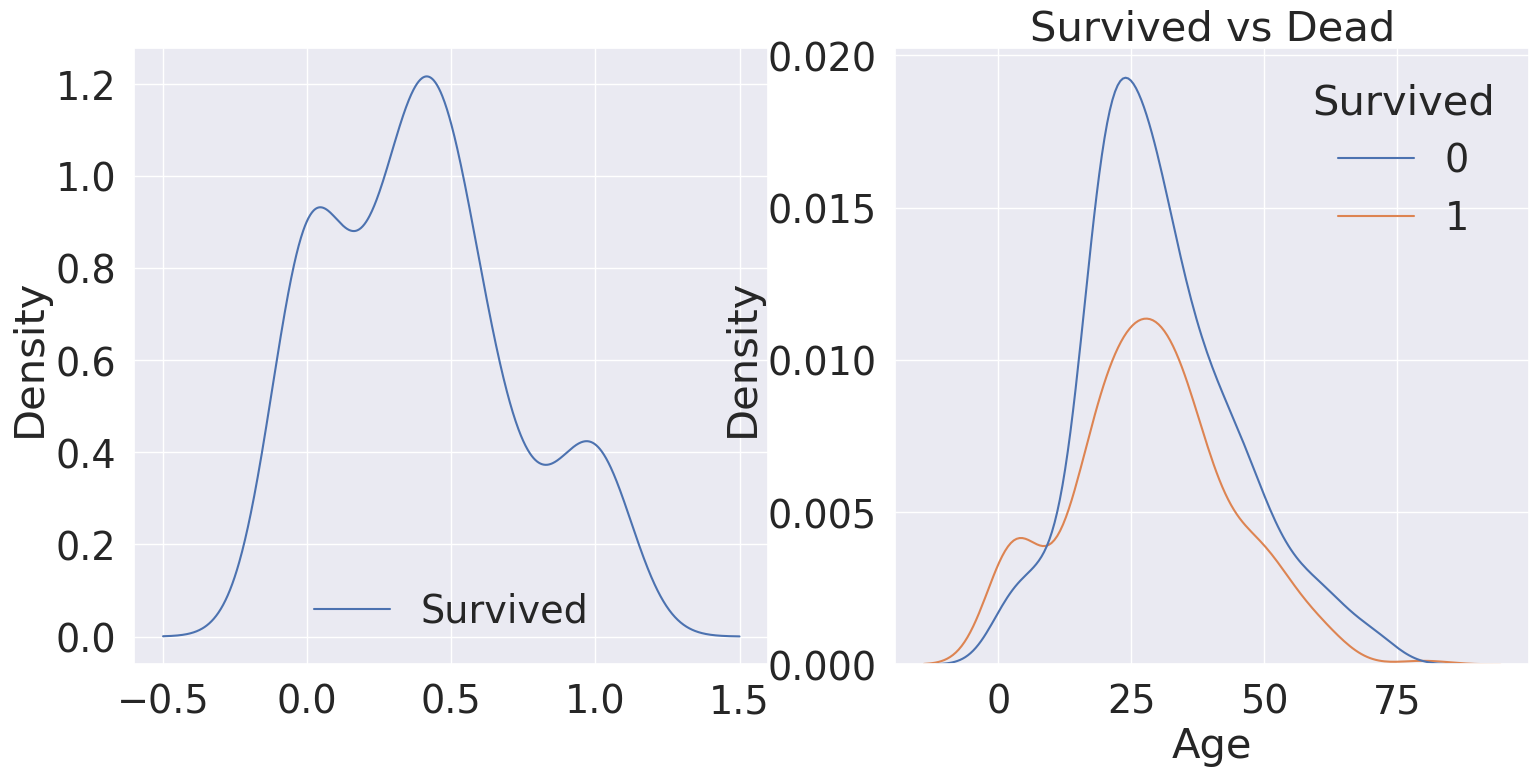

In [15]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

titanic_data[['Age', 'Survived']].groupby('Age', as_index=True).mean().plot.kde(ax=ax[0])

sns.kdeplot(data=titanic_data, x='Age', hue='Survived', ax=ax[1])
ax[1].set_title('Survived vs Dead')

plt.show()

***※ Pclass & Age Combination***

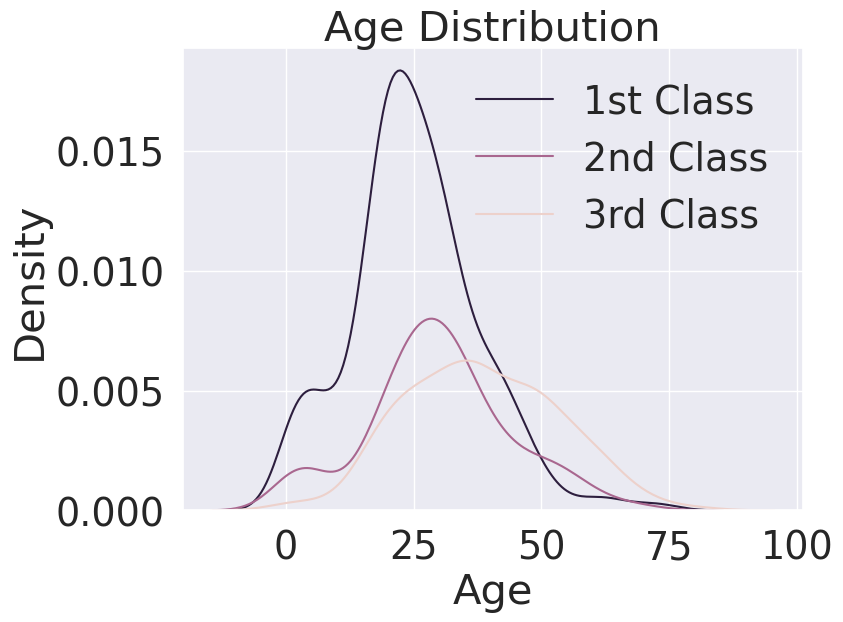

In [16]:
plt.figure(figsize=(8, 6))

sns.kdeplot(x='Age', hue='Pclass', data=titanic_data)
plt.title('Age Distribution')
plt.legend(['1st Class', '2nd Class', '3rd Class'])
plt.xlabel('Age')

plt.show()

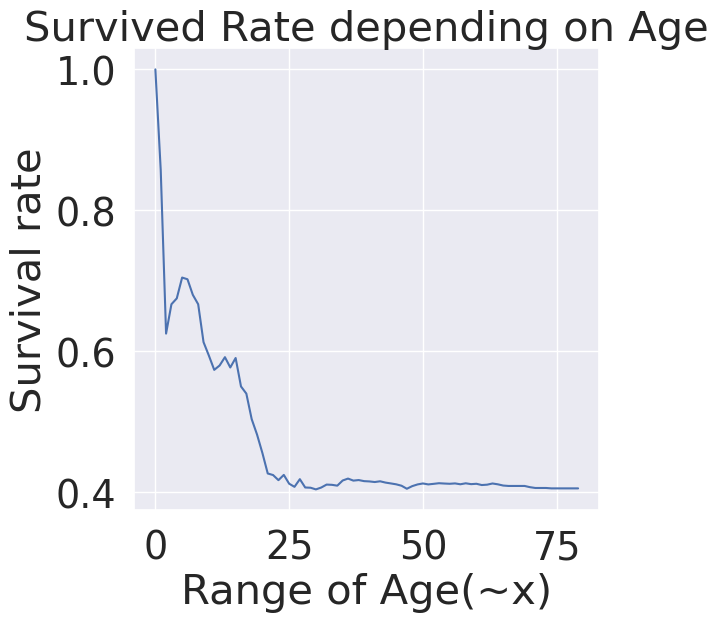

In [17]:
survived_rate = [titanic_data[titanic_data['Age'] < i]['Survived'].sum() / len(titanic_data[titanic_data['Age'] < i]['Survived']) for i in range(1, 81)]

plt.figure(figsize=(6, 6))
plt.plot(survived_rate)
plt.title('Survived Rate depending on Age')
plt.xlabel('Range of Age(~x)')
plt.ylabel('Survival rate')
plt.show()

***※ Pclass & Sex & Age Combination***

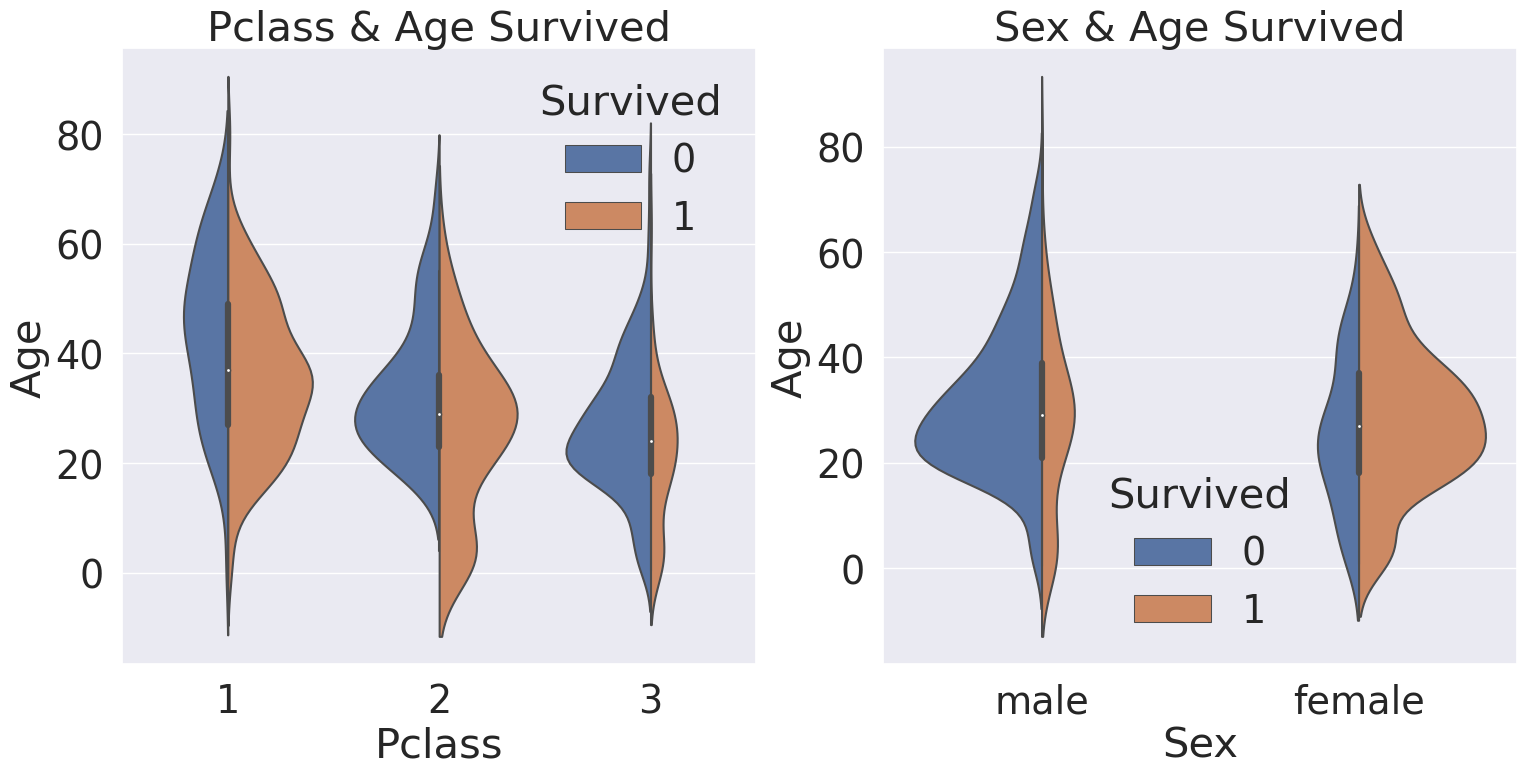

In [18]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

sns.violinplot(x='Pclass', y='Age', hue='Survived', data=titanic_data, scale='count', split=True, ax=ax[0])
ax[0].set_title('Pclass & Age Survived')

sns.violinplot(x='Sex', y='Age', hue='Survived', data=titanic_data, scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex & Age Survived')

plt.show()

=> **Conclusion**: Younger passengers were more likely to survive however other conditions were.

##### ***4. Embarked***

<Axes: xlabel='Embarked'>

<Figure size 600x600 with 0 Axes>

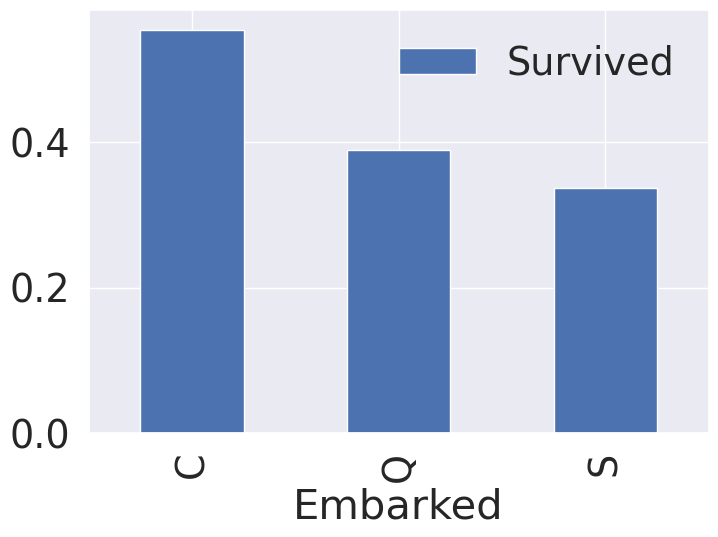

In [19]:
plt.figure(figsize=(6, 6))
titanic_data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

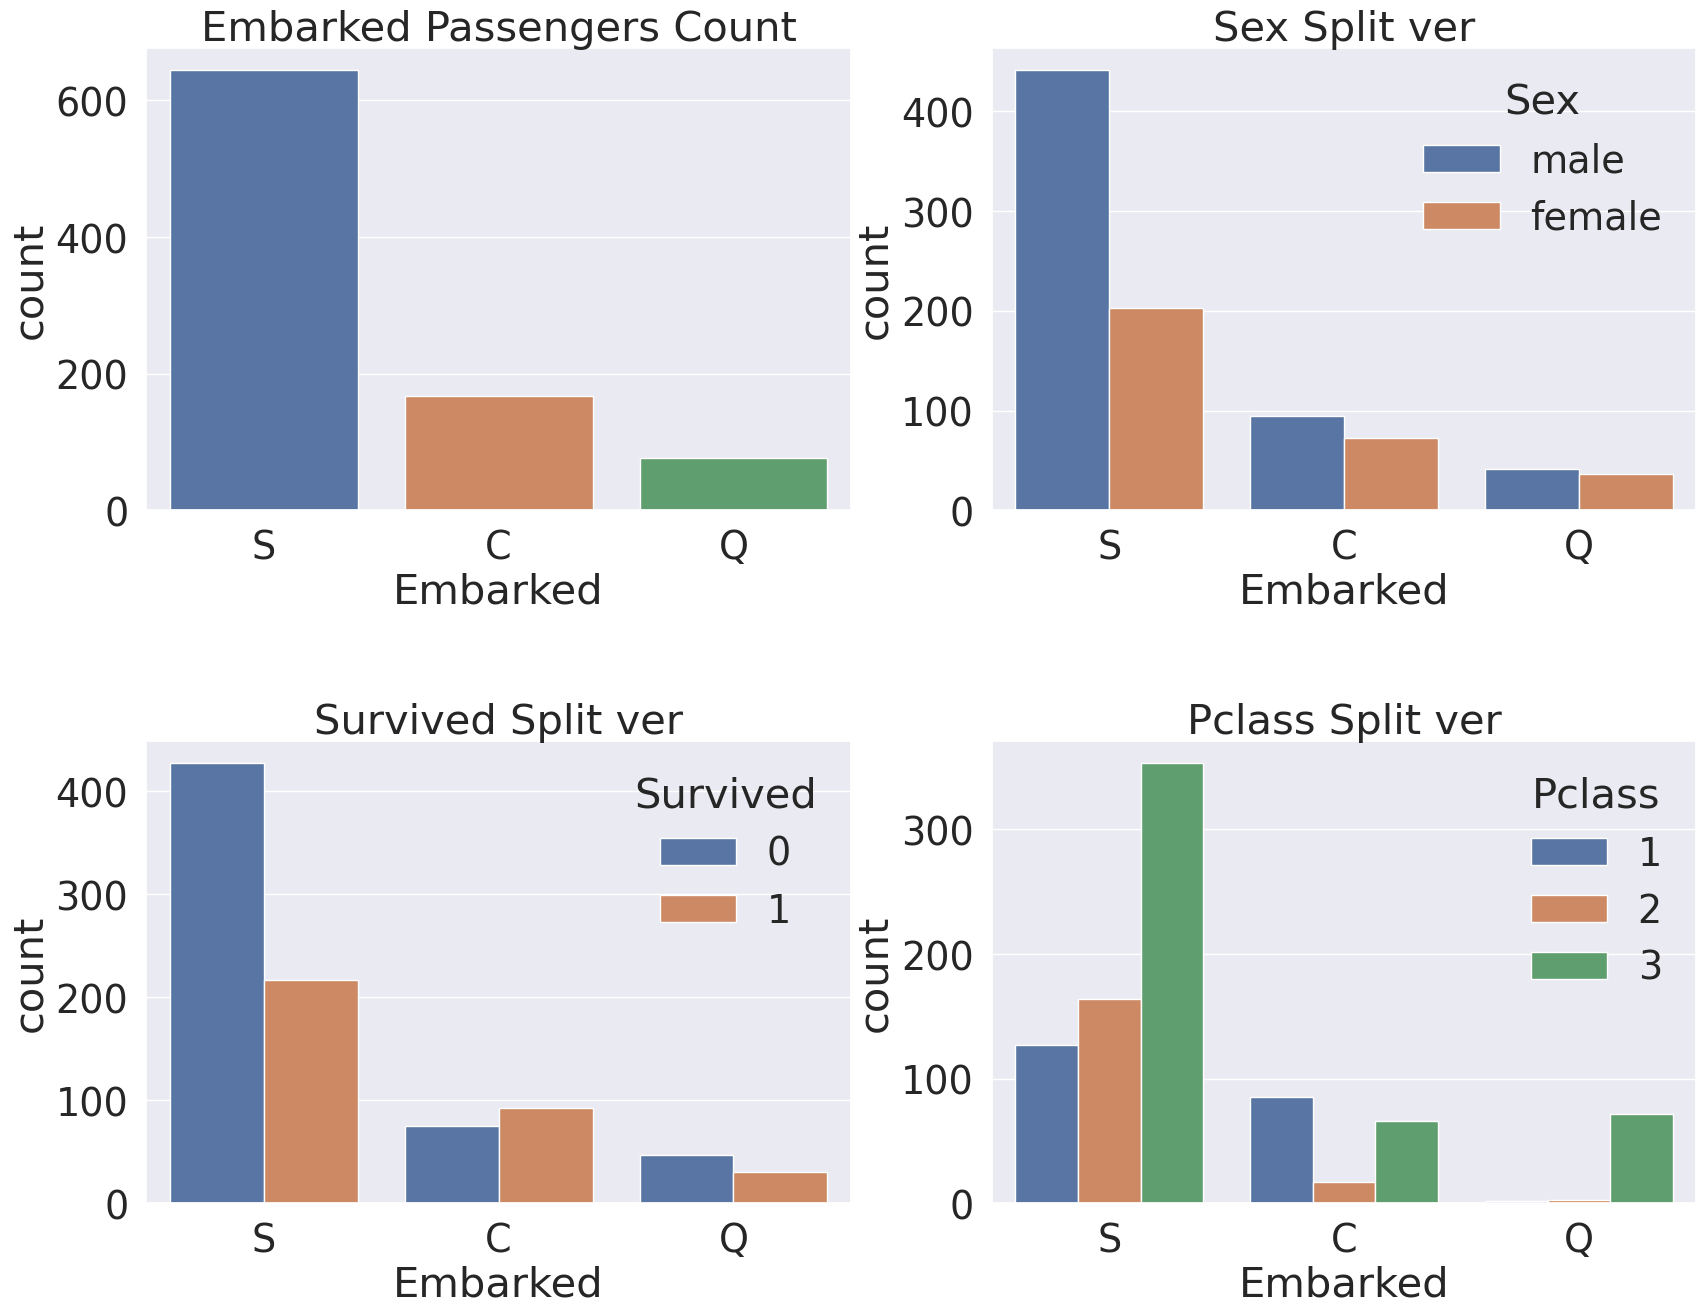

In [20]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))

sns.countplot(x='Embarked', data=titanic_data, ax=ax[0,0])
ax[0,0].set_title('Embarked Passengers Count')

sns.countplot(x='Embarked', hue='Sex', data=titanic_data, ax=ax[0,1])
ax[0,1].set_title('Sex Split ver')

sns.countplot(x='Embarked', hue='Survived', data=titanic_data, ax=ax[1,0])
ax[1,0].set_title('Survived Split ver')

sns.countplot(x='Embarked', hue='Pclass', data=titanic_data, ax=ax[1,1])
ax[1,1].set_title('Pclass Split ver')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

=> **Conclusion**
1. Passengers mostly embarked at Port S, whatever their sex is.
2. Passengers, in Pclass 1, mostly embarked at Port S.
   Contrary, passengers in Pclass 3 mostly embarked at Port S.
3. Although Port S had most of male passengers,
   it has quite high survive rate due to Pclass ratio.

##### ***5. SibSp(Siblings) & Parch(Parents+Childrens)***

In [21]:
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch'] + 1
titanic_test_data['FamilySize'] = titanic_test_data['SibSp'] + titanic_test_data['Parch'] + 1

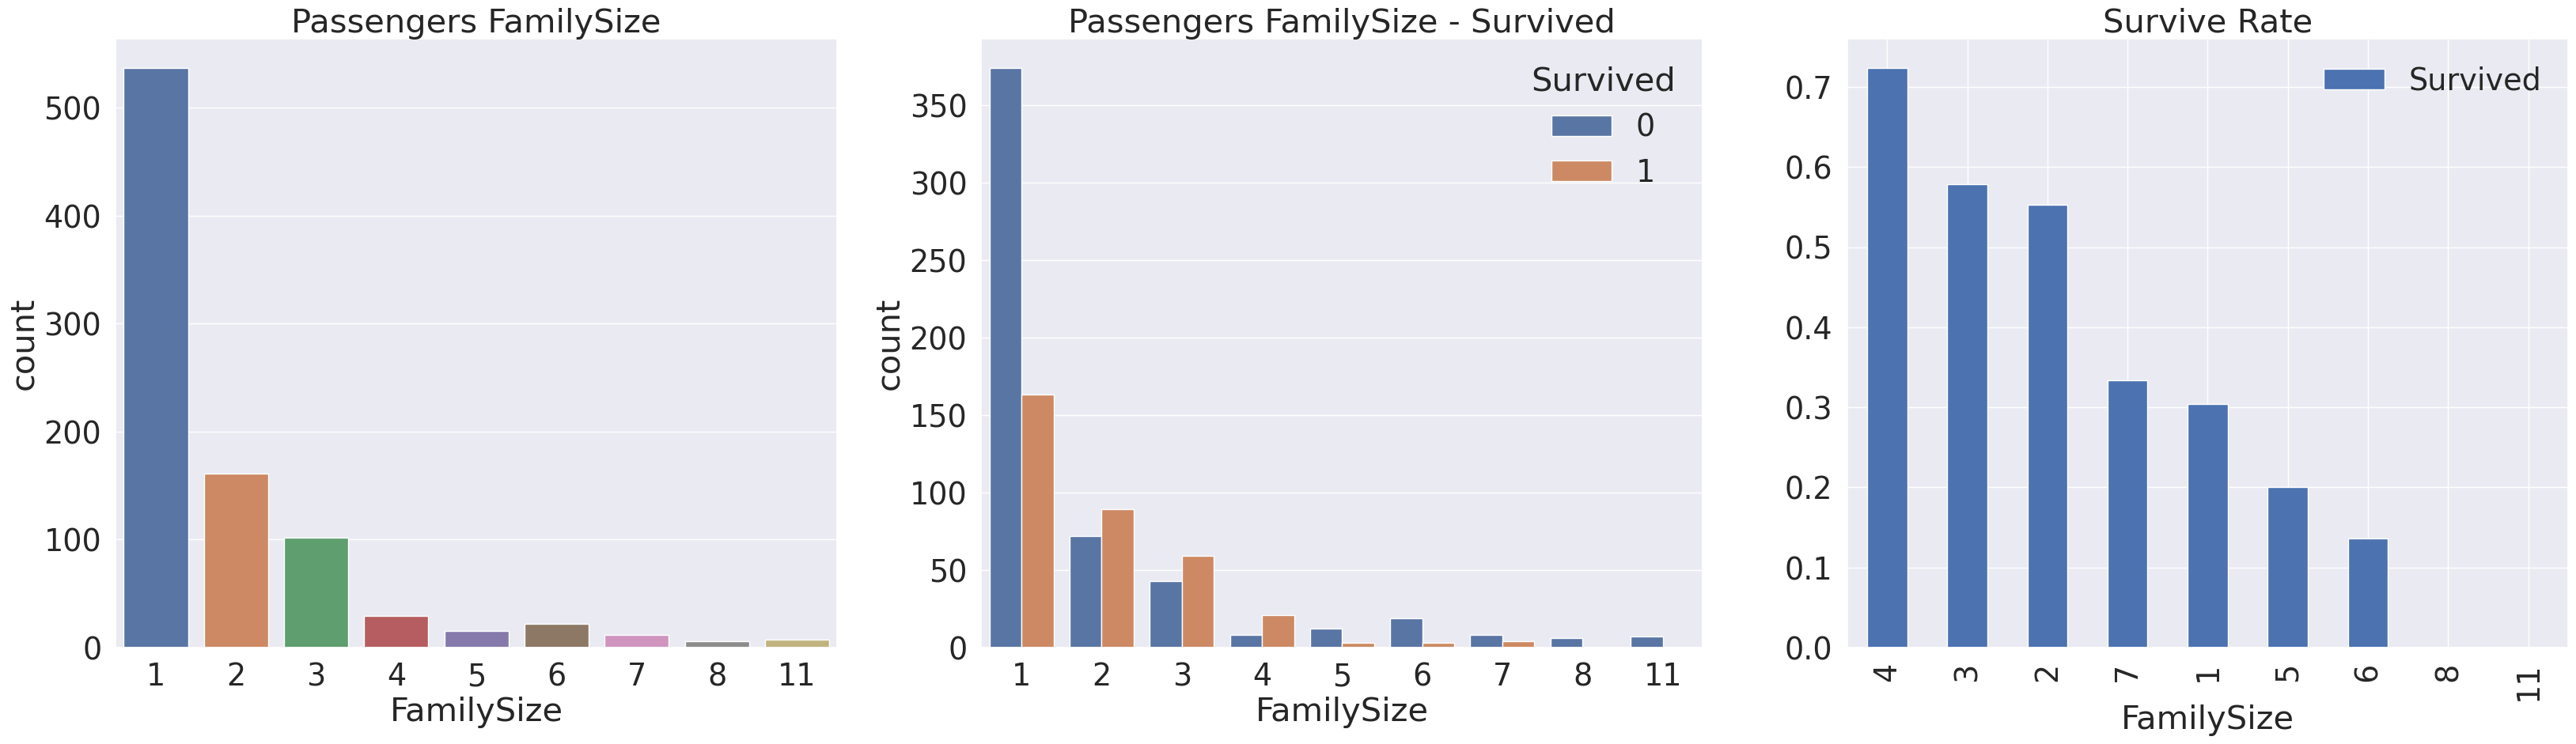

In [22]:
f, ax = plt.subplots(1, 3, figsize=(40, 10))

sns.countplot(x='FamilySize', data=titanic_data, ax=ax[0])
ax[0].set_title('Passengers FamilySize')

sns.countplot(x='FamilySize', hue='Survived', data=titanic_data, ax=ax[1])
ax[1].set_title('Passengers FamilySize - Survived')

titanic_data[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('Survive Rate')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

=> **Conclusion**: Most of passengers had no other families. In contrast, survived rate of those who has 1~3 families were higher than others.

##### ***6. Fare***

In [23]:
titanic_data['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

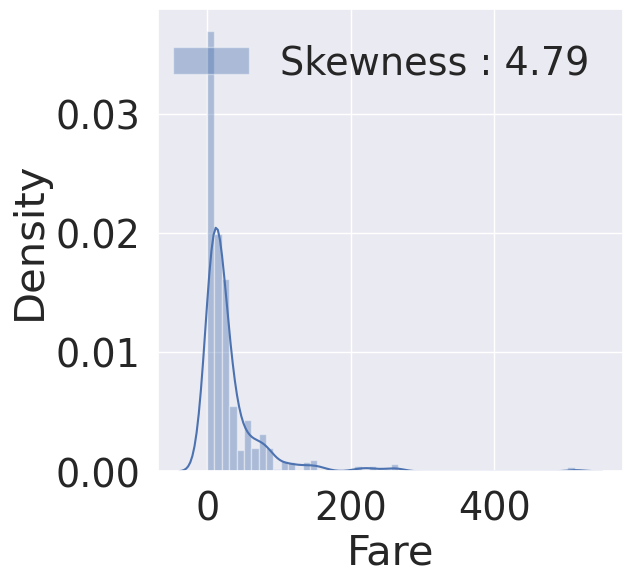

In [24]:
f, ax = plt.subplots(1, 1, figsize=(6, 6))

g = sns.distplot(titanic_data['Fare'], color='b', ax=ax, label='Skewness : {:.2f}'.format(titanic_data['Fare'].skew()))
g = g.legend(loc='best')

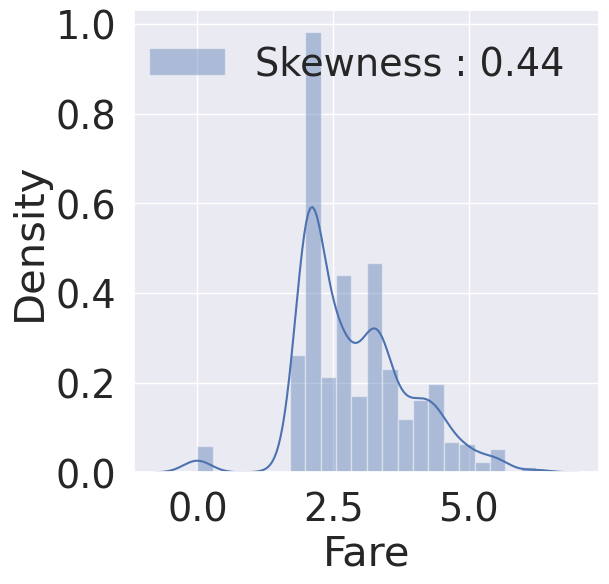

In [25]:
# Data + Log() - to reduce Skewness.
titanic_data.loc[titanic_data.Fare.isnull(), 'Fare'] = titanic_data['Fare'].mean()
titanic_test_data.loc[titanic_test_data.Fare.isnull(), 'Fare'] = titanic_test_data['Fare'].mean()

titanic_data['Fare'] = titanic_data['Fare'].map(lambda x: np.log(x) if x > 0 else 0)
titanic_test_data['Fare'] = titanic_test_data['Fare'].map(lambda x: np.log(x) if x > 0 else 0)

f, ax = plt.subplots(1, 1, figsize=(6, 6))
g = sns.distplot(titanic_data['Fare'], color='b', ax=ax, label='Skewness : {:.2f}'.format(titanic_data['Fare'].skew()))
g = g.legend(loc='best')

##### ***7. Ticket***
※ 'Cabin' Skipped.

In [26]:
titanic_data['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

# ***3. Feature Engineering***

: Fill NULL data, change Continuous data into Categorical,
  change String data into Numerical data, apply One-hot encoding, drop data, etc.

※ These are optional, and must apply to both train and test set.

### ***3.1. Fill Null data***
Fill null data in Age category - using titles in passenger names

##### ***3.1.1. Modify names into titles***

In [27]:
titanic_data['NameTitle'] = titanic_data.Name.str.extract('([a-zA-Z]+)\.')
titanic_test_data['NameTitle'] = titanic_test_data.Name.str.extract('([a-zA-Z]+)\.')
titanic_data['NameTitle'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: NameTitle, dtype: int64

In [28]:
pd.crosstab(titanic_data['NameTitle'], titanic_data['Sex']).T.style.background_gradient(cmap='summer_r')

NameTitle,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [29]:
titanic_data['NameTitle'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

titanic_test_data['NameTitle'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

           PassengerId  Survived    Pclass        Age     SibSp     Parch  \
NameTitle                                                                   
Mrs         456.393701  0.795276  1.984252  35.981818  0.692913  0.818898   
Miss        411.741935  0.704301  2.284946  21.860000  0.698925  0.537634   
Master      414.975000  0.575000  2.625000   4.574167  2.300000  1.375000   
Mr          455.880907  0.162571  2.381853  32.739609  0.293006  0.151229   
Other       564.444444  0.111111  1.666667  45.888889  0.111111  0.111111   

               Fare  FamilySize  
NameTitle                        
Mrs        3.443751    2.511811  
Miss       3.123713    2.236559  
Master     3.340710    4.675000  
Mr         2.651507    1.444234  
Other      2.641605    1.222222  


<Axes: xlabel='NameTitle'>

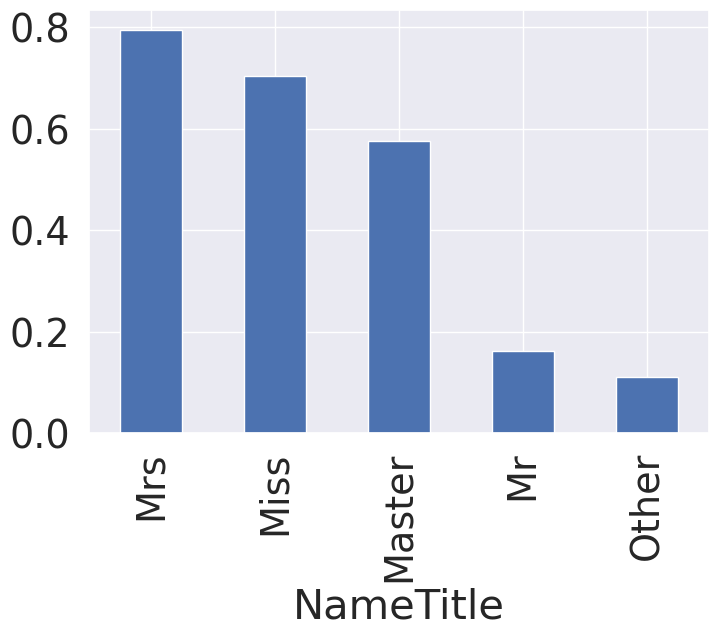

In [30]:
print(titanic_data.groupby('NameTitle').mean().sort_values(by='Survived', ascending=False))
titanic_data.groupby('NameTitle')['Survived'].mean().sort_values(ascending=False).plot.bar()

=> **Conclusion**: Female titles, especially 'Mrs' and 'Miss', had high survived rate.

##### ***3.1.2. Fill Null 'Age' data***
Fill NAN Age data to mean of Age

In [31]:
titanic_data.loc[(titanic_data.Age.isnull())&(titanic_data.NameTitle=='Mr'),'Age'] = 33
titanic_data.loc[(titanic_data.Age.isnull())&(titanic_data.NameTitle=='Mrs'),'Age'] = 36
titanic_data.loc[(titanic_data.Age.isnull())&(titanic_data.NameTitle=='Master'),'Age'] = 5
titanic_data.loc[(titanic_data.Age.isnull())&(titanic_data.NameTitle=='Miss'),'Age'] = 22
titanic_data.loc[(titanic_data.Age.isnull())&(titanic_data.NameTitle=='Other'),'Age'] = 46

titanic_test_data.loc[(titanic_test_data.Age.isnull())&(titanic_test_data.NameTitle=='Mr'),'Age'] = 33
titanic_test_data.loc[(titanic_test_data.Age.isnull())&(titanic_test_data.NameTitle=='Mrs'),'Age'] = 36
titanic_test_data.loc[(titanic_test_data.Age.isnull())&(titanic_test_data.NameTitle=='Master'),'Age'] = 5
titanic_test_data.loc[(titanic_test_data.Age.isnull())&(titanic_test_data.NameTitle=='Miss'),'Age'] = 22
titanic_test_data.loc[(titanic_test_data.Age.isnull())&(titanic_test_data.NameTitle=='Other'),'Age'] = 46

##### ***3.1.3. Fill Null 'Embarked' data***
Fill NAN Embarked data to port S

In [32]:
titanic_data['Embarked'].fillna('S', inplace=True)

### ***3.2. Change Data from Continuous to Categorical***
Categorize Age data

In [33]:
def categorize_age(x):
    return x // 10

titanic_data['Age_categorized'] = titanic_data['Age'].apply(categorize_age)
titanic_test_data['Age_categorized'] = titanic_test_data['Age'].apply(categorize_age)

### ***3.3. Change Data from String to Numerical***
Change String data (i.e. NameTitle, Embarked, Sex) into Numbers

In [34]:
# Change NameTitle
titanic_data['NameTitle'] = titanic_data['NameTitle'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})
titanic_test_data['NameTitle'] = titanic_test_data['NameTitle'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})

In [35]:
# Change Embarked
titanic_data['Embarked'] = titanic_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
titanic_test_data['Embarked'] = titanic_test_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [36]:
# Change Sex
titanic_data['Sex'] = titanic_data['Sex'].map({'female': 0, 'male': 1})
titanic_test_data['Sex'] = titanic_test_data['Sex'].map({'female': 0, 'male': 1})

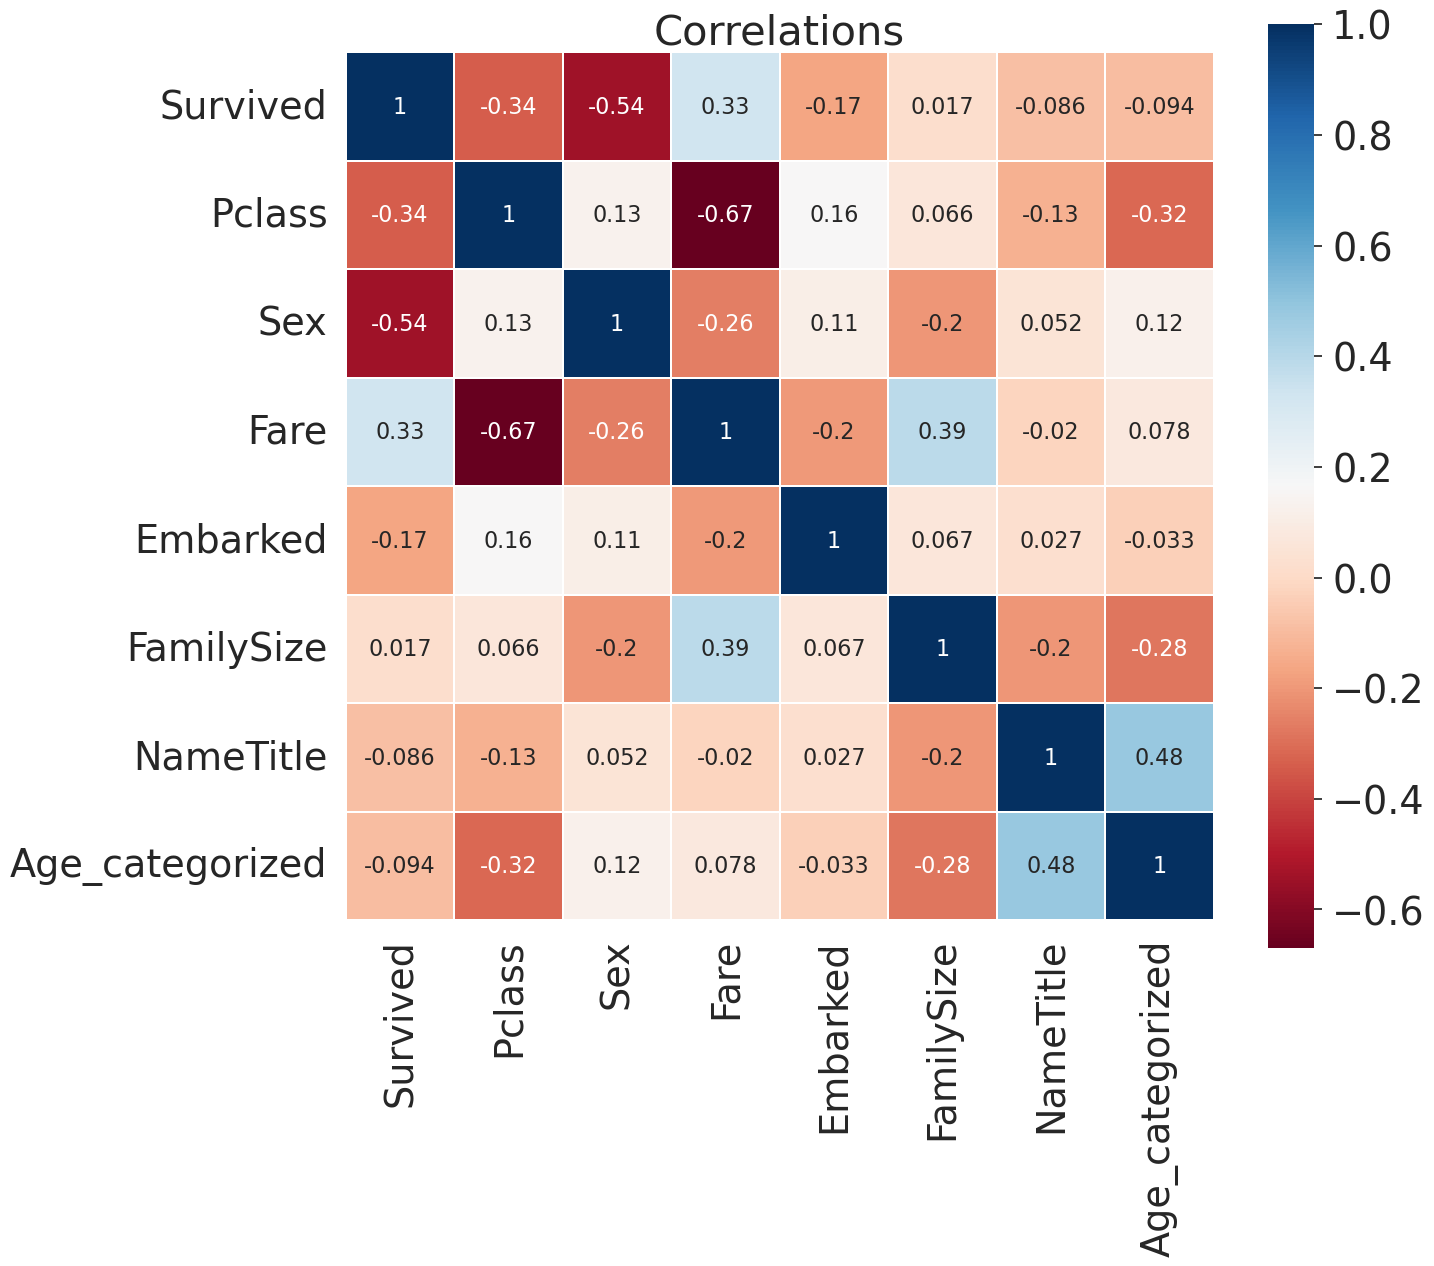

In [37]:
# Get Correlation
heatmap_data = titanic_data[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize', 'NameTitle', 'Age_categorized']] 

colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('Correlations')
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})

del heatmap_data

=> **Conclusion**
1. Survived rate has some correlations with Sex and Pclass.
2. FamilySize, Title, Age were not really correlated with Survived rate.

### ***3.4. Data Preprocessing***

***One-hot encoding***

In [38]:
titanic_data = pd.get_dummies(titanic_data, columns=['NameTitle'], prefix='Title')
titanic_test_data = pd.get_dummies(titanic_test_data, columns=['NameTitle'], prefix='Title')

In [39]:
titanic_data = pd.get_dummies(titanic_data, columns=['Embarked'], prefix='Emb')
titanic_test_data = pd.get_dummies(titanic_test_data, columns=['Embarked'], prefix='Emb')

In [40]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,FamilySize,Age_categorized,Title_0,Title_1,Title_2,Title_3,Title_4,Emb_0,Emb_1,Emb_2
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,1.981001,...,2,2.0,0,0,1,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,4.266662,...,2,3.0,0,0,0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,2.070022,...,1,2.0,0,1,0,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,3.972177,...,2,3.0,0,0,0,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,2.085672,...,1,3.0,0,0,1,0,0,0,0,1


### ***3.5. Delete data***

In [41]:
titanic_data.drop(['PassengerId', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)
titanic_test_data.drop(['PassengerId', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [42]:
titanic_data.head()

,Survived,Pclass,Sex,Fare,FamilySize,Age_categorized,Title_0,Title_1,Title_2,Title_3,Title_4,Emb_0,Emb_1,Emb_2
0,0,3,1,1.981001,2,2.0,0,0,1,0,0,0,0,1
1,1,1,0,4.266662,2,3.0,0,0,0,1,0,1,0,0
2,1,3,0,2.070022,1,2.0,0,1,0,0,0,0,0,1
3,1,1,0,3.972177,2,3.0,0,0,0,1,0,0,0,1
4,0,3,1,2.085672,1,3.0,0,0,1,0,0,0,0,1


In [43]:
titanic_test_data.head()

,Pclass,Sex,Fare,FamilySize,Age_categorized,Title_0,Title_1,Title_2,Title_3,Title_4,Emb_0,Emb_1,Emb_2
0,3,1,2.057860,1,3.0,0,0,1,0,0,0,1,0
1,3,0,1.945910,2,4.0,0,0,0,1,0,0,0,1
2,2,1,2.270836,1,6.0,0,0,1,0,0,0,1,0
3,3,1,2.159003,1,2.0,0,0,1,0,0,0,0,1
4,3,0,2.508582,3,2.0,0,0,0,1,0,0,0,1


# ***4. ML Model Prediction***
: Using sklearn, make ML model and use preprocessed data to predict

In [44]:
X_train = titanic_data.drop('Survived', axis=1).values
target_label = titanic_data['Survived'].values
X_test = titanic_test_data.values

In [45]:
X_tr, X_va, y_tr, y_va = train_test_split(X_train, target_label, test_size=0.3, random_state=2018)

In [46]:
model = RandomForestClassifier()
model.fit(X_tr, y_tr)
preds = model.predict(X_va)

In [47]:
print("Total Num: %d // Accuracy: %.2f" % (y_va.shape[0], metrics.accuracy_score(preds, y_va) * 100))

Total Num: 268 // Accuracy: 81.72


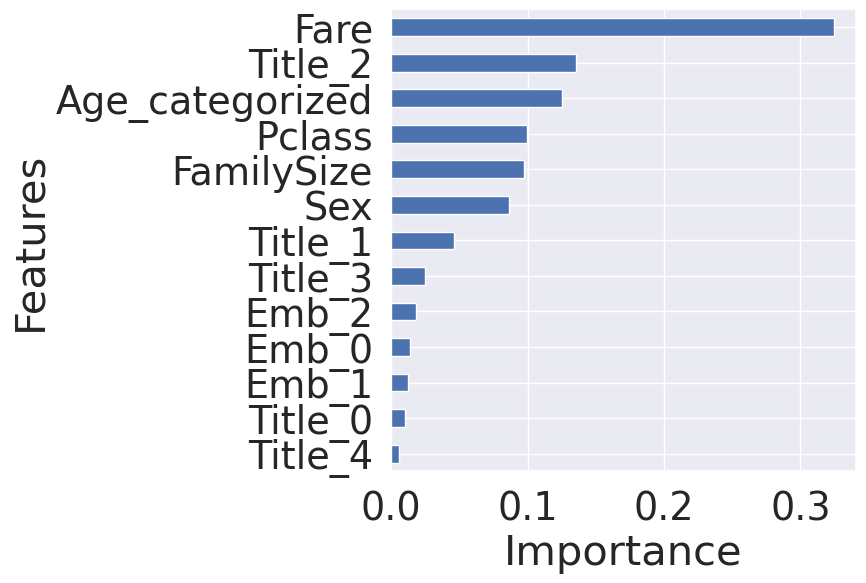

In [48]:
plt.figure(figsize=(6, 6))
pd.Series(model.feature_importances_, index=titanic_test_data.columns).sort_values(ascending=True).plot.barh()
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [49]:
submission = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [50]:
final_preds = model.predict(X_test)
submission['Survived'] = final_preds

In [51]:
submission.to_csv('/kaggle/working/submission.csv', index=False)